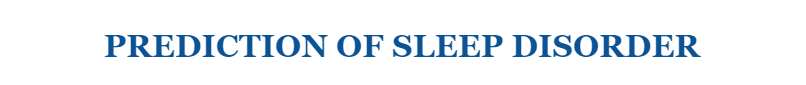

## Problem Statement:

Predict the occurrence of Sleep Disorders such as Insomnia and Sleep Apnea

## Data Definition:

1. Person ID: Unique identifier for each person
2. Gender: Gender of the person (Male/Female)
3. Age: Age of the person in years
4. Occupation: Occupation of the person
5. Sleep Duration: Number of hours the person sleeps per day
6. Quality of Sleep: Rating of Quality of sleep (Range: 1 to 10)
7. Physical Activity Level: Duration (minutes) of person engaging in physical activity every day
8. Stress Level: Rating of Stress level experienced by the person (Range: 1 to 10)
9. BMI Category: BMI category of the person (Obsese/ Normal/ Overweight)
10. Blood Pressure: Blood pressure measure of person (Systole/ Diastole)
11. Heart Rate (bpm): Resting Heart rate of person (beats per minute)
12. Daily Steps: Number of steps taken by the person per day
13. Sleep Disorder: Presence/ Absence of Sleep disorder in person (None, Insomnia, Sleep Apnea)

## Overview of 'Sleep Disorder' variable:

* None: Person does not exhibit any specific sleep disorder
* Insomnia: Person experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep
* Sleep Apnea: Person suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

1. Import Libraries
2. Read the Data
3. Data Preprocessing
    3.1 Datatypes & Dimension of data
    3.2 Statistical Summary
    3.3 Missing Data Analysis
    3.4 Label Encoding for Categorical variables
4. Exploratory Data Analysis
    4.1 Class Distribution of Target Variables
    4.2 Multivariate Analysis
5. Correlation 
6. Data Standardization
7. Creation of Train & Test Dataset
8. Model Building (Classification)
    8.1 Model-1: Bagging Meta- Estimator
    8.2 Model-2: AdaBoost
    8.3 Model-3: XGBoost
    8.4 Model-4: Naive Bayes
    8.5 Model-5: RandomForest
9. Model Comparison
10. Conclusion


## 1. Import Libraries:

In [136]:
# Suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Data manipulation and analysis
import pandas as pd

# Mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# Data visualization library for 2D and 3D plots (built on numpy)
import matplotlib.pyplot as plt

# Plot statistical graphics (based on matplotlib)
import seaborn as sns

# Set default setting of seaborn
sns.set()

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Data Standardization
from sklearn.preprocessing import MinMaxScaler

# Split Dataset
from sklearn.model_selection import train_test_split

from sklearn import metrics

# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Classification Report
from sklearn.metrics import classification_report

# Bagging Meta-Estimator model
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

# XGBoost model
!pip install xgboost
from xgboost.sklearn import XGBClassifier

# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

# RandomForest model
from sklearn.ensemble import RandomForestClassifier

## 2. Read the Data

In [45]:
raw_data = pd.read_csv(r'D:\PGA_DataAnalytics_MachineLearning\Capstone projects\ML\Sleep_health_and_lifestyle_dataset.csv')
raw_data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [20]:
data = raw_data.copy(deep = True)

## 3. Data Preprocessing

## 3.1 Datatypes & Dimension of data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [22]:
data.shape

(374, 13)

In [23]:
data.size

4862

## 3.2 Statistical Summary

### 3.2.1 Numerical Variables

In [24]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### 3.2.2 Categorical Variables

In [25]:
data.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


## 3.3 Missing Data Analysis

In [26]:
missing_values = data.isnull().sum()
missing_values

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

There are no missing values in the data

## 3.4 Label Encoding for Categorical Variables

In [47]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])
data['Blood Pressure'] = label_encoder.fit_transform(data['Blood Pressure'])

data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,22,85,3000,2
5,6,1,28,9,5.9,4,30,8,2,22,85,3000,0
6,7,1,29,10,6.3,6,40,7,2,22,82,3500,0
7,8,1,29,1,7.8,7,75,6,0,6,70,8000,1
8,9,1,29,1,7.8,7,75,6,0,6,70,8000,1
9,10,1,29,1,7.8,7,75,6,0,6,70,8000,1


## 4. Exploratory Data Analysis 

## 4.1 Class Distribution of Target Variables

Count of people not suffering Sleep Disorder:  219
Count of people suffering Insomnia:  78
Count of people suffering Sleep Apnea:  77


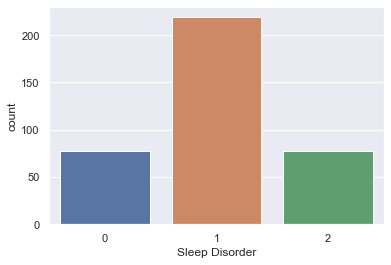

In [129]:
ax = sns.countplot(data['Sleep Disorder'], label="Count")

x, y, z = data['Sleep Disorder'].value_counts()

print('Count of people not suffering Sleep Disorder: ', x)
print('Count of people suffering Insomnia: ', y)
print('Count of people suffering Sleep Apnea: ', z)

Note: 


* 0 - Insomnia
* 1 - No Sleep Disorder
* 2 - Sleep Apnea

## 4.2 Multivariate Analysis

### 4.2.1 Analysis of Sleep Disorder with Gender 

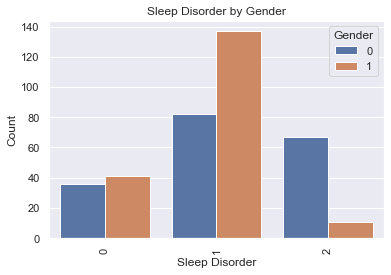

In [29]:
sns.countplot(data=data, x='Sleep Disorder', hue='Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.title('Sleep Disorder by Gender')
plt.xticks(rotation=90)
plt.show()

Gender:
* 0 - Female
* 1 - Male

Sleep Disorder:
* 0 - Insomnia
* 1 - No Sleep Disorder
* 2 - Sleep Apnea


* Most of the people who suffer Insomnia are Male
* Most of the people who suffer Sleep Apnea are Female

### 4.2.2 Analysis of Sleep Disorder with Age

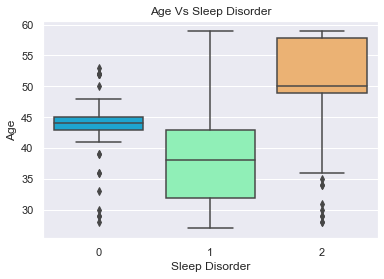

In [49]:
sns.boxplot(data=data, x='Sleep Disorder', y='Age', palette= "rainbow")
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.title('Age Vs Sleep Disorder')
plt.show()

Sleep Disorder:
* 0 - Insomnia
* 1 - No Sleep Disorder
* 2 - Sleep Apnea


* Most people who suffer Sleep Apnea are older than 50

### 4.2.3 Analysis of Sleep Disorder with Occupation

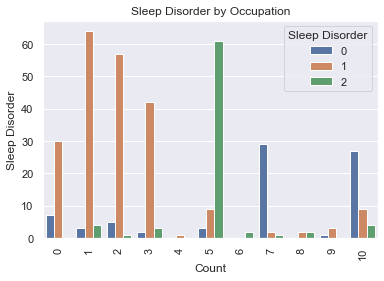

In [30]:
sns.countplot(data=data, x='Occupation', hue='Sleep Disorder')
plt.xlabel('Count')
plt.ylabel('Sleep Disorder')
plt.title('Sleep Disorder by Occupation')
plt.xticks(rotation=90)
plt.show()

Sleep Disorder:
* 0 - Insomnia
* 1 - No Sleep Disorder
* 2 - Sleep Apnea

Occupation:
* 0 - Accountant
* 1 - Doctor 
* 2 - Engineer
* 3 - Lawyer
* 4 - Manager
* 5 - Nurse
* 6 - Sales Representative
* 7 - Salesperson
* 8 - Scientist
* 9 - Software Engineer
* 10 - Teacher


* Doctors suffer the highest rate of Insomnia
* More Lawyers, Engineers, Accountants suffer Insonmnia
* Nurses suffer highest rate of Sleep Apnea

### 4.2.4 Analysis of Sleep Disorder with Quality of Sleep

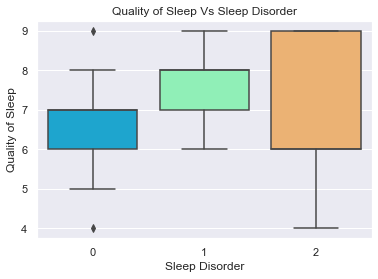

In [50]:
sns.boxplot(data=data, x='Sleep Disorder', y='Quality of Sleep', palette= "rainbow")
plt.xlabel('Sleep Disorder')
plt.ylabel('Quality of Sleep')
plt.title('Quality of Sleep Vs Sleep Disorder')
plt.show()

Sleep Disorder:

* 0 - Insomnia
* 1 - No Sleep Disorder
* 2 - Sleep Apnea



### 4.2.5 Analysis of Sleep Disorder with Sleep Duration

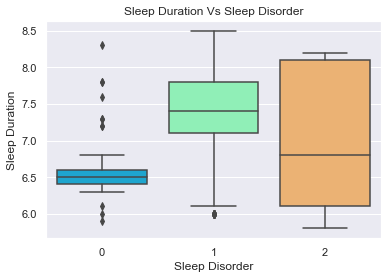

In [51]:
sns.boxplot(data=data, x='Sleep Disorder', y='Sleep Duration', palette= "rainbow")
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration Vs Sleep Disorder')
plt.show()

Sleep Disorder:
* 0 - Insomnia
* 1 - No Sleep Disorder
* 2 - Sleep Apnea


* People suffering Insomnia sleep on an average of 6.5 hrs a day
* People suffering Sleep Apnea sleep on an average of 6.9 hrs a day
* People who doesnot suffer Sleep Disorder sleeps on an average of 7.4 hrs a day 

### 4.2.6 Analysis of Sleep Disorder with Stress Level

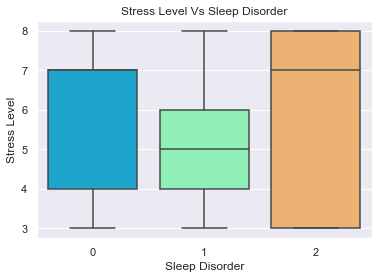

In [52]:
sns.boxplot(data=data, x='Sleep Disorder', y='Stress Level', palette= "rainbow")
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level')
plt.title('Stress Level Vs Sleep Disorder')
plt.show()

Sleep Disorder:

* 0 - Insomnia
* 1 - No Sleep Disorder
* 2 - Sleep Apnea


* People suffering Sleep Apnea have highest Stress level
* People suffering Insomnia have Stress level higher than Normal

### 4.2.7 Analysis of Sleep Disorder with Heart Rate

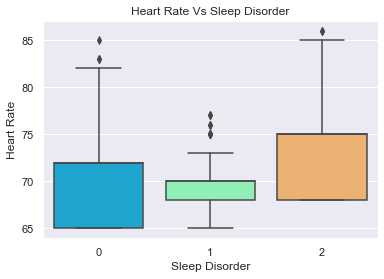

In [53]:
sns.boxplot(data=data, x='Sleep Disorder', y='Heart Rate', palette= "rainbow")
plt.xlabel('Sleep Disorder')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Vs Sleep Disorder')
plt.show()

Sleep Disorder:
* 0 - Insomnia
* 1 - No Sleep Disorder
* 2 - Sleep Apnea


* People suffering Insomnia have Heart Rate lower than Normal as well as higher than Normal
* People suffering Sleep Apnea have Hear rate higher than Normal

## 5. Correlation 

## 5.1 Correlation Matrix

In [54]:
corr = data.corr()
corr

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,1.000000,-0.584229,0.990516,0.269343,0.296305,0.431612,0.149882,-0.394287,0.527614,0.583563,-0.225467,0.043844,0.170980
Gender,-0.584229,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.352060,-0.176272,0.217105,-0.014509,-0.253415
Age,0.990516,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.511329,0.572813,-0.225606,0.057973,0.232000
Occupation,0.269343,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.699504,0.546791,0.043928,-0.105877,-0.169800
Sleep Duration,0.296305,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.376358,-0.191704,-0.516455,-0.039533,0.177552
Quality of Sleep,0.431612,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.312562,-0.147769,-0.659865,0.016791,0.179592
Physical Activity Level,0.149882,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.077156,0.271913,0.136971,0.772723,0.433214
Stress Level,-0.394287,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163895,0.117545,0.670026,0.186829,-0.036058
BMI Category,0.527614,-0.352060,0.511329,0.699504,-0.376358,-0.312562,0.077156,0.163895,1.000000,0.724217,0.295585,-0.005059,0.016573
Blood Pressure,0.583563,-0.176272,0.572813,0.546791,-0.191704,-0.147769,0.271913,0.117545,0.724217,1.000000,0.288300,0.119455,0.197906


## 5.2 Correlation Map

<AxesSubplot:>

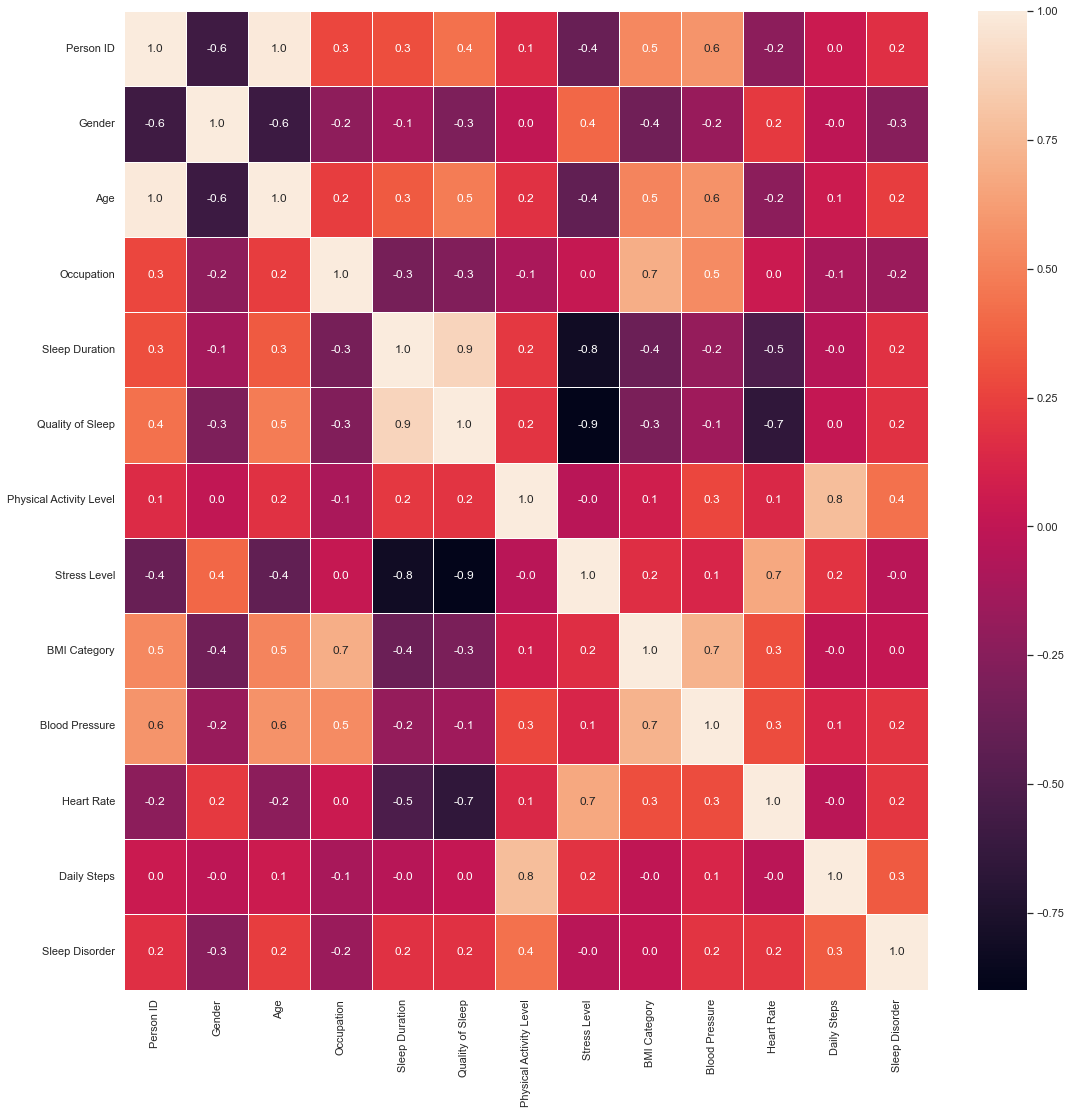

In [55]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## 5.3 Correlation plot

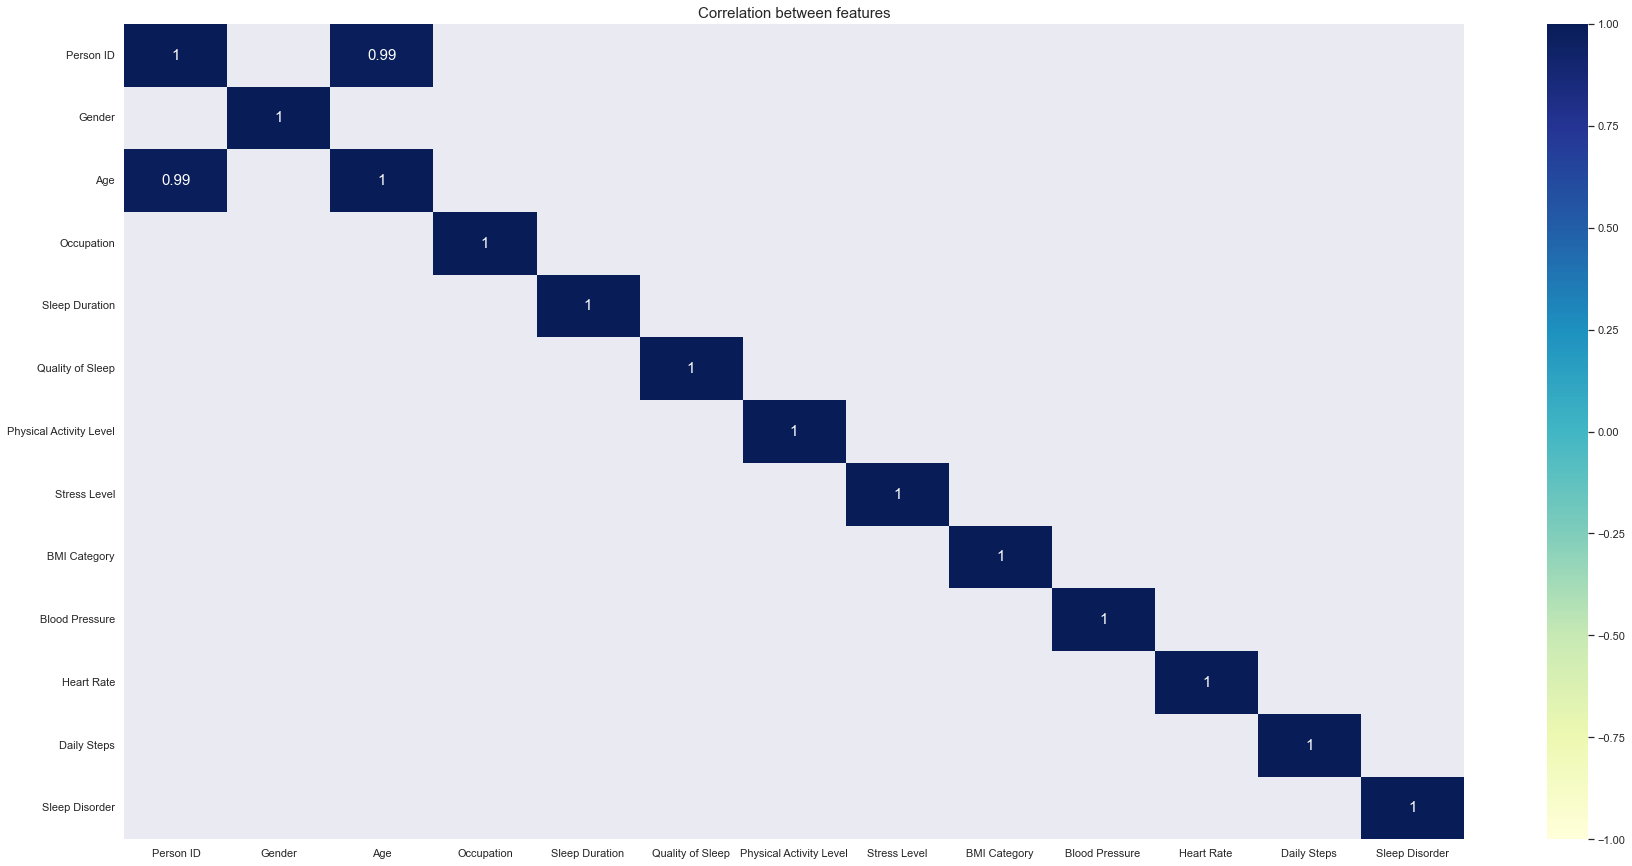

In [56]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size": 15})
plt.title('Correlation between features', fontsize=15)
plt.show()

* From the Correlation matrix, we can see that variables 'Age', 'Gender' & 'Person ID' have a strong positive correlation with each other. 
* Ideally, we should not select these features together for training the model.

In [57]:
drop_list = ['Age', 'Gender', 'Person ID']

data_cleaned = data.drop(drop_list,axis = 1)        
data_cleaned.head()

,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,9,6.1,6,42,6,3,11,77,4200,1
1,1,6.2,6,60,8,0,9,75,10000,1
2,1,6.2,6,60,8,0,9,75,10000,1
3,6,5.9,4,30,8,2,22,85,3000,2
4,6,5.9,4,30,8,2,22,85,3000,2


In [58]:
data_cleaned.columns

Index(['Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

<AxesSubplot:>

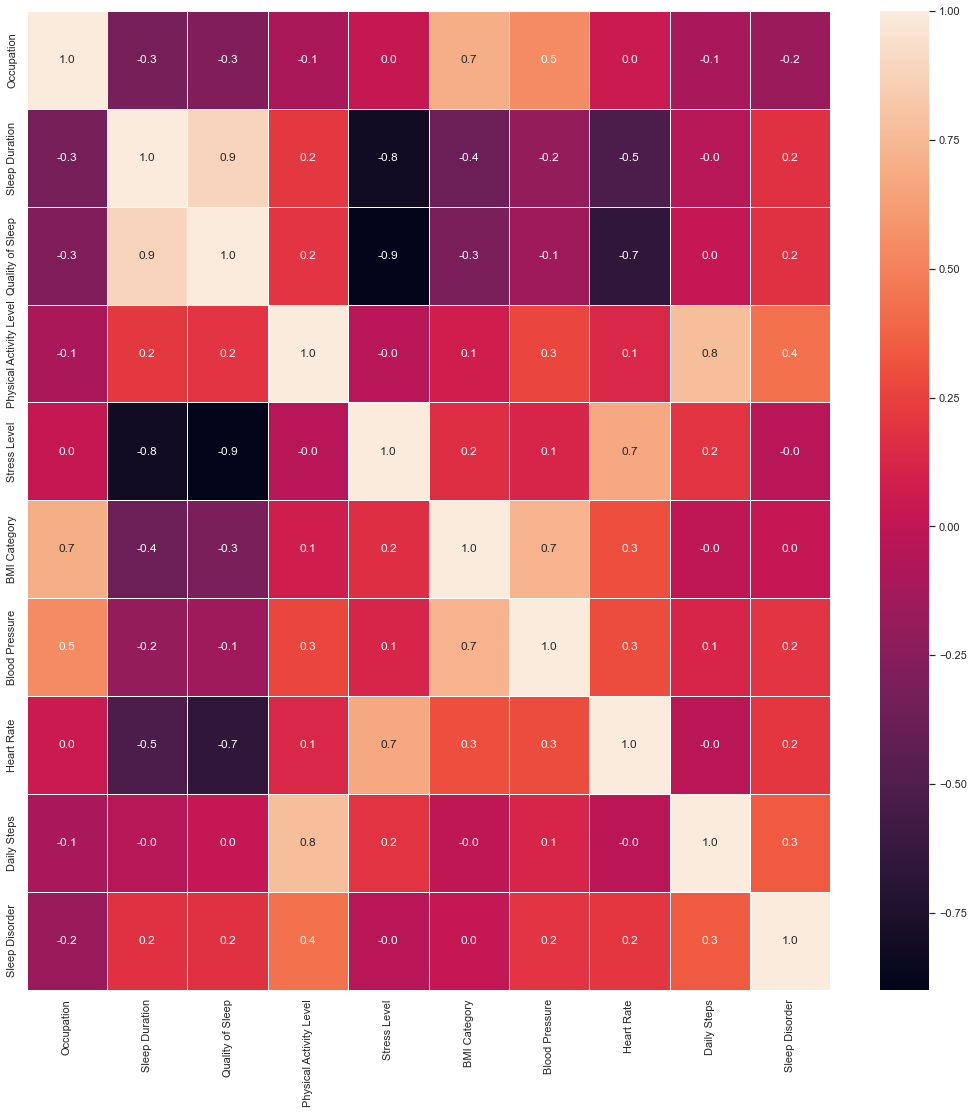

In [61]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data_cleaned.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## 6. Data Standardization

In [137]:
x = data_cleaned.drop(['Sleep Disorder'], axis = 1)

scaler = MinMaxScaler()
scaler.fit(x)

X = scaler.fit_transform(x)
y = data_cleaned['Sleep Disorder']

## 7. Creation of Train & Test Data set

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train ", X_train.shape)
print("X_test ", X_test.shape)

print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

X_train  (299, 9)
X_test  (75, 9)
y_train  (299,)
y_test  (75,)


## 8. Model Building (Classification model)

## 8.1 Model-1: Bagging Meta- Estimator 

### 8.1.1 Building model:

In [140]:
meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=12))

meta_estimator.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=12))

### 8.1.2 Prediction on Test Dataset:

In [141]:
y_pred_bme = meta_estimator.predict(X_test)

### 8.1.3 Confusion Matrix:

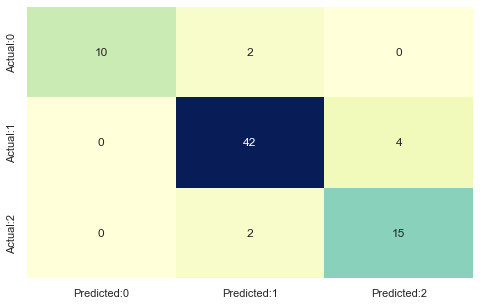

In [142]:
cm = confusion_matrix(y_test, y_pred_bme)

conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0','Predicted:1', 'Predicted:2'],
                           index=['Actual:0','Actual:1', 'Actual:2'])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

### 8.1.4 Classification Report:

In [143]:
result = classification_report(y_test,y_pred_bme)
print(result)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.91      0.91      0.91        46
           2       0.79      0.88      0.83        17

    accuracy                           0.89        75
   macro avg       0.90      0.88      0.89        75
weighted avg       0.90      0.89      0.89        75



### 8.1.5 Tabulate Results:

In [144]:
cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

result_Tab = pd.DataFrame(columns = cols)

Bagging_Meta_estimator = pd.Series({'Model': "Bagging Meta-estimator",
                                    'Precision Score': metrics.precision_score(y_test, y_pred_bme, average='micro'),
                                    'Recall Score': metrics.recall_score(y_test, y_pred_bme, average='micro'),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_bme),
                                    'f1-score': metrics.f1_score(y_test, y_pred_bme, average='micro')})

result_Tab = result_Tab.append(Bagging_Meta_estimator , ignore_index = True)
result_Tab

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.893333,0.893333,0.893333,0.893333


## 8.2 Model-2: AdaBoost

### 8.2.1 Building model:

In [145]:
adaboost = AdaBoostClassifier(random_state=12)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=12)

### 8.2.2 Prediction on Test Dataset:

In [146]:
y_pred_adaboost  = adaboost.predict(X_test)

### 8.2.3 Confusion Matrix:

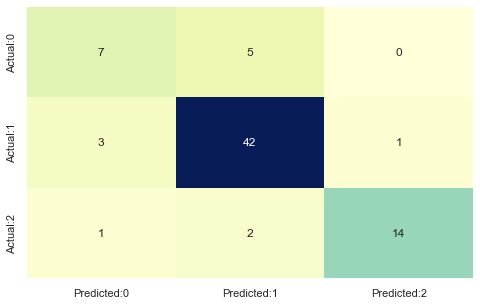

In [147]:
cm = confusion_matrix(y_test, y_pred_adaboost)

conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0','Predicted:1', 'Predicted:2'],
                           index=['Actual:0','Actual:1', 'Actual:2'])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

### 8.2.4 Classification Report:

In [148]:
result = classification_report(y_test, y_pred_adaboost)

print(result)

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.86      0.91      0.88        46
           2       0.93      0.82      0.87        17

    accuracy                           0.84        75
   macro avg       0.81      0.77      0.79        75
weighted avg       0.84      0.84      0.84        75



### 8.2.5 Tabulate Results:

In [149]:
Adaboost_metrics = pd.Series({'Model': "AdaBoost",
                 'Precision Score': metrics.precision_score(y_test, y_pred_adaboost,average='micro'),
                 'Recall Score': metrics.recall_score(y_test, y_pred_adaboost,average='micro'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_adaboost),
                 'f1-score':metrics.f1_score(y_test, y_pred_adaboost,average='micro')})

result_Tab = result_Tab.append(Adaboost_metrics, ignore_index = True)
result_Tab

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.893333,0.893333,0.893333,0.893333
1,AdaBoost,0.84,0.84,0.84,0.84


## 8.3 Model-3: XGBoost

### 8.3.1 Building model:

In [150]:
xgbm = XGBClassifier(random_state=12, learning_rate=0.01)

xgbm.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### 8.3.2 Prediction on Test Dataset:

In [151]:
y_pred_xgbm  = xgbm.predict(X_test)

### 8.3.3 Confusion Matrix:

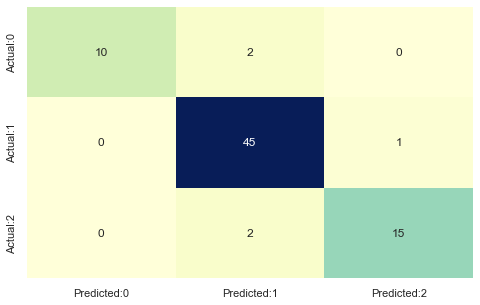

In [152]:
cm = confusion_matrix(y_test, y_pred_xgbm)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1', 'Predicted:2'],
                           index=['Actual:0','Actual:1', 'Actual:2'])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

### 8.3.4 Classification Report:

In [153]:
result = classification_report(y_test, y_pred_xgbm)

print(result)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.92      0.98      0.95        46
           2       0.94      0.88      0.91        17

    accuracy                           0.93        75
   macro avg       0.95      0.90      0.92        75
weighted avg       0.94      0.93      0.93        75



### 8.3.5 Tabulate Results:

In [154]:
xgbm_metrices = pd.Series({'Model': "XGBM",
                 'Precision Score': metrics.precision_score(y_test, y_pred_xgbm,average='micro'),
                 'Recall Score': metrics.recall_score(y_test, y_pred_xgbm,average='micro'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_xgbm),
                  'f1-score':metrics.f1_score(y_test, y_pred_xgbm,average='micro')})

result_Tab = result_Tab.append(xgbm_metrices, ignore_index = True)
result_Tab

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.893333,0.893333,0.893333,0.893333
1,AdaBoost,0.84,0.84,0.84,0.84
2,XGBM,0.933333,0.933333,0.933333,0.933333


## 8.4 Model-4: Naive Bayes

### 8.4.1 Building model:

In [155]:
gnb = GaussianNB()

GNB = OneVsRestClassifier(gnb)

GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

### 8.4.2 Prediction on Test Dataset:

In [156]:
y_pred_GNB = GNB.predict(X_test)

### 8.4.3 Confusion Matrix:

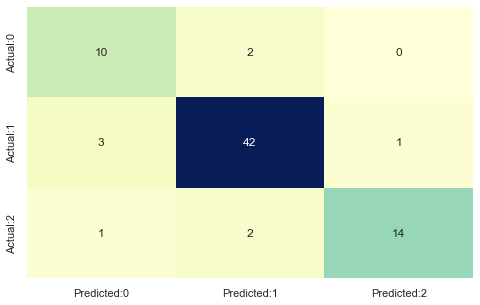

In [157]:
cm = confusion_matrix(y_test, y_pred_GNB)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],
                           index=['Actual:0','Actual:1','Actual:2'])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

### 8.4.4 Classification Report:

In [158]:
result = classification_report(y_test, y_pred_GNB)

print(result)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.91      0.91      0.91        46
           2       0.93      0.82      0.87        17

    accuracy                           0.88        75
   macro avg       0.85      0.86      0.85        75
weighted avg       0.89      0.88      0.88        75



### 8.4.5 Tabulate Results:

In [159]:
Naive_Bayes = pd.Series({'Model': "Naive Bayes",
                 'Precision Score': metrics.precision_score(y_test, y_pred_GNB,average="macro"),
                 'Recall Score': metrics.recall_score(y_test, y_pred_GNB ,average="macro"),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB),
                  'f1-score':metrics.f1_score(y_test, y_pred_GNB,average = "macro")})

result_Tab = result_Tab.append(Naive_Bayes , ignore_index = True)
result_Tab

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.893333,0.893333,0.893333,0.893333
1,AdaBoost,0.84,0.84,0.84,0.84
2,XGBM,0.933333,0.933333,0.933333,0.933333
3,Naive Bayes,0.853554,0.856635,0.88,0.852425


## 8.5 Model-5: RandomForest

### 8.5.1 Building model:

In [160]:
rf_reg = RandomForestClassifier(random_state=12)

rf_reg.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

### 8.5.2 Prediction on Test Dataset:

In [161]:
y_pred_rf = rf_reg.predict(X_test)

### 8.5.3 Confusion Matrix:

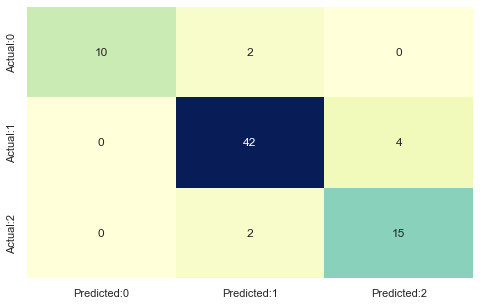

In [162]:
cm = confusion_matrix(y_test, y_pred_rf)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],
                           index=['Actual:0','Actual:1','Actual:2'])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

### 8.5.4 Classification Report:

In [163]:
result = classification_report(y_test, y_pred_rf)

print(result)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.91      0.91      0.91        46
           2       0.79      0.88      0.83        17

    accuracy                           0.89        75
   macro avg       0.90      0.88      0.89        75
weighted avg       0.90      0.89      0.89        75



### 8.5.5 Tabulate Results:

In [164]:
Random_Forest = pd.Series({'Model': "Random Forest",
                 'Precision Score': metrics.precision_score(y_test, y_pred_rf,average="macro"),
                 'Recall Score': metrics.recall_score(y_test, y_pred_rf ,average="macro"),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_rf),
                  'f1-score':metrics.f1_score(y_test, y_pred_rf, average = "macro")})

result_Tab = result_Tab.append(Random_Forest , ignore_index = True)
result_Tab

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.893333,0.893333,0.893333,0.893333
1,AdaBoost,0.84,0.84,0.84,0.84
2,XGBM,0.933333,0.933333,0.933333,0.933333
3,Naive Bayes,0.853554,0.856635,0.88,0.852425
4,Random Forest,0.900839,0.876243,0.893333,0.885156


## 9. Model Comparison

Comparing the performance measures of all the Classification models build:
* Bagging Meta-Estimator
* AdaBoost
* XGBoost
* Naive Bayes
* Random Forest

In [165]:
result_Tab

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.893333,0.893333,0.893333,0.893333
1,AdaBoost,0.84,0.84,0.84,0.84
2,XGBM,0.933333,0.933333,0.933333,0.933333
3,Naive Bayes,0.853554,0.856635,0.88,0.852425
4,Random Forest,0.900839,0.876243,0.893333,0.885156


## 10. Conclusion

* From the tabulated results, it is observed that 'XGBoost' model has the highest performance measures when compare to the other models.
* Hence we can conclude that 'XGBoost' is the best among all the other models built.